# Pendolo di Kater

In [4]:
g_padova = 9.806
sigma_g_padova = 0.001

In [5]:
incertezza_alpha = 0

## Set

In [6]:
import glob
import math
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
graph_base_name = '../grafici/graph_'

style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

In [8]:
palette = sns.husl_palette(18)
print(' ', [' '+str(x) for x in range(6)],' ', [' '+str(x+6) for x in range(6)], ['_'+str(x+12) for x in range(6)])
palette

  [' 0', ' 1', ' 2', ' 3', ' 4', ' 5']   [' 6', ' 7', ' 8', ' 9', ' 10', ' 11'] ['_12', '_13', '_14', '_15', '_16', '_17']


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9707505829046977, 0.4626541987597626, 0.26486329418330007),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.5310702086647983, 0.6569113639885688, 0.1931838276161326),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.1998437102815942, 0.6927711055021983, 0.4485948481767363),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.22126158707091403, 0.6600977737826563, 0.7915486637100363),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5392573577708815, 0.5821140171749066, 0.9584212824085171),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371),
 (0.9648889414626248, 0.41896694790705413, 0.692031255809005)]

## Fase 1

In [9]:
f1_0 = np.stack([np.genfromtxt(x, delimiter=',')[:10,0] for x in glob.glob('./Misure/fase1/*O')], axis=0)
f1_1 = np.stack([np.genfromtxt(x, delimiter=',')[:10,0] for x in glob.glob('./Misure/fase1/*Op')], axis=0)

In [10]:
ds1 = xr.Dataset(
    data_vars = dict(
        period = (['dir', 'dist', 'n'], np.stack([f1_0, f1_1], axis=0))
    ),
    coords = dict(
        dir = ('dir', ['O', 'Op']),
        dist = ('dist', [10, 20, 30, 40, 60, 70, 80, 90]),
        n = ('n', range(10))
    )
)

ds1

<xarray.Dataset>
Dimensions:  (dir: 2, dist: 8, n: 10)
Coordinates:
  * dir      (dir) <U2 'O' 'Op'
  * dist     (dist) int64 10 20 30 40 60 70 80 90
  * n        (n) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    period   (dir, dist, n) float64 2.011 2.011 2.011 ... 2.024 2.024 2.024

In [11]:
da1 = ds1.sum('n').period

da1

<xarray.DataArray 'period' (dir: 2, dist: 8)>
array([[20.112 , 19.7896, 19.5317, 19.3533, 19.2847, 19.4311, 19.7314,
        20.2051],
       [20.5527, 19.1738, 18.4967, 18.2751, 18.665 , 19.1033, 19.6355,
        20.236 ]])
Coordinates:
  * dir      (dir) <U2 'O' 'Op'
  * dist     (dist) int64 10 20 30 40 60 70 80 90

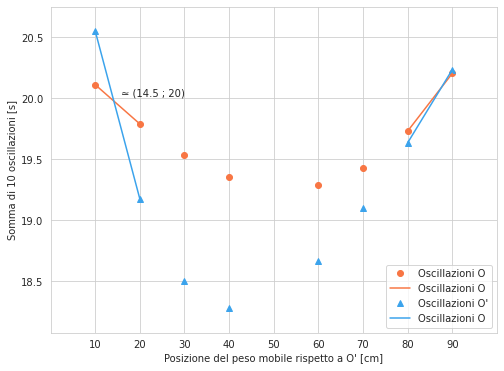

In [68]:
def plot1(da):
    plt.figure(figsize=(8,6))

    fmts = iter(['o', '^'])
    labels = iter(["Oscillazioni O", "Oscillazioni O'", "Oscillazioni O", "Oscillazioni O'", "Oscillazioni O", "Oscillazioni O'"])
    colors = iter([palette[x] for x in [1, 12, 1, 1, 12, 12] ])

    def plot1_1(daa):
        X = daa.dist.values
        Y = daa.to_numpy()

        plt.plot(X, Y, next(fmts), label=next(labels), color=next(colors))
    
    def plot1_2(daa):
        X = daa.dist.values
        Y = daa.to_numpy()

        plt.plot(X, Y, '-', label=next(labels), color=next(colors))

    plot1_1(da.sel(dir='O'))
    plot1_1(da.sel(dir='Op'))

    #

    plot1_2(da.sel(dir='O').where(da.dist <= 20, drop=True))
    plot1_2(da.sel(dir='O').where(da.dist >= 80, drop=True))
    
    plot1_2(da.sel(dir='Op').where(da.dist <= 20, drop=True))
    plot1_2(da.sel(dir='Op').where(da.dist >= 80, drop=True))

    #

    # Lims
    xmin, xmax = min(da.dist.values), max(da.dist.values)
    ymin, ymax = da.min(), da.max()
    plt.xlim(xmin - 10, xmax + 10)
    plt.ylim(ymin - .2, ymax + .2)

    plt.xticks(range(10,100,10))

    plt.xlabel("Posizione del peso mobile rispetto a O' [cm]")
    plt.ylabel("Somma di 10 oscillazioni [s]")

    # Legend
    order = [0,2,1,4]
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='lower right', ncol=1)

    # Note
    plt.gca().annotate(
        '≃ (14.5 ; 20)', xy=(14.5, 20), 
        xycoords='data', 
        textcoords='data', 
        xytext=(23, 20.02),
        horizontalalignment='center')
        #arrowprops=dict(facecolor='black', width=0.3, headwidth=5, headlength=5, shrink=0.15))
    
    plt.savefig(graph_base_name+'fase1', dpi=200)

plot1(da1)


## Fase 2

In [13]:
f2_0 = np.stack([np.genfromtxt(x, delimiter=',')[:50,0] for x in glob.glob('./Misure/fase2/*O')], axis=0)
f2_1 = np.stack([np.genfromtxt(x, delimiter=',')[:50,0] for x in glob.glob('./Misure/fase2/*Op')], axis=0)

In [14]:
ds2 = xr.Dataset(
    data_vars = dict(
        period = (['dir', 'dist', 'n'], np.stack([f2_0, f2_1], axis=0))
    ),
    coords = dict(
        dir = ('dir', ['O', 'Op']),
        dist = ('dist', range(12,17,1)),
        n = ('n', range(50))
    )
)

ds2

<xarray.Dataset>
Dimensions:  (dir: 2, dist: 5, n: 50)
Coordinates:
  * dir      (dir) <U2 'O' 'Op'
  * dist     (dist) int64 12 13 14 15 16
  * n        (n) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
Data variables:
    period   (dir, dist, n) float64 2.005 2.005 2.005 ... 1.962 1.963 1.962

In [15]:
ds2s = ds2.sum('n')

ds2s

<xarray.Dataset>
Dimensions:  (dir: 2, dist: 5)
Coordinates:
  * dir      (dir) <U2 'O' 'Op'
  * dist     (dist) int64 12 13 14 15 16
Data variables:
    period   (dir, dist) float64 100.2 100.1 99.89 99.73 ... 99.49 98.77 98.14

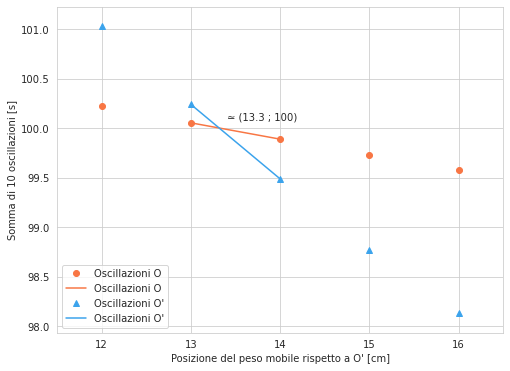

In [73]:
def plot2(ds):
    plt.figure(figsize=(8,6))

    fmts = iter(['o', '^'])
    labels = iter(["Oscillazioni O", "Oscillazioni O'", "Oscillazioni O", "Oscillazioni O'"])
    colors = iter([palette[x] for x in [1, 12, 1, 12] ])

    def plot2_1(dss):
        X = dss.dist.values
        Y = dss.period

        plt.plot(X, Y, next(fmts), label=next(labels), color=next(colors))
    
    def plot2_2(dss):
        X = dss.dist.values
        Y = dss.period

        plt.plot(X, Y, '-', label=next(labels), color=next(colors))

    plot2_1(ds.sel(dir='O'))
    plot2_1(ds.sel(dir='Op'))

    #

    condition = (ds.dist > 12) & (ds.dist < 15)
    plot2_2(ds.sel(dir='O').where(condition, drop=True))    
    plot2_2(ds.sel(dir='Op').where(condition, drop=True))

    #

    # Lims
    xmin, xmax = min(ds.dist.values), max(ds.dist.values)
    ymin, ymax = ds.period.min(), ds.period.max()
    plt.xlim(xmin - .5, xmax + .5)
    plt.ylim(ymin - .2, ymax + .2)

    # plt.xticks(range(10,100,10))

    plt.xlabel("Posizione del peso mobile rispetto a O' [cm]")
    plt.ylabel("Somma di 10 oscillazioni [s]")

    # Legend
    order = [0,2,1,3]
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='lower left', ncol=1)

    # Note
    plt.gca().annotate(
        '≃ (13.3 ; 100)', xy=(13.3, 100), 
        xycoords='data', 
        textcoords='data', 
        xytext=(13.8, 100.08),
        horizontalalignment='center')
        #arrowprops=dict(facecolor='black', width=0.3, headwidth=5, headlength=5, shrink=0.15))
    
    plt.savefig(graph_base_name+'fase2', dpi=200)

plot2(ds2s)


## Fase 3

In [17]:
f3_0 = np.stack([np.genfromtxt(x, delimiter=',')[:50,0] for x in glob.glob('./Misure/fase3/*O')], axis=0)
f3_1 = np.stack([np.genfromtxt(x, delimiter=',')[:50,0] for x in glob.glob('./Misure/fase3/*Op')], axis=0)

In [18]:
ds3 = xr.Dataset(
    data_vars = dict(
        period = (['dir', 'dist', 'n'], np.stack([f3_0, f3_1], axis=0))
    ),
    coords = dict(
        dir = ('dir', ['O', 'Op']),
        dist = ('dist', [12.8, 13.3, 13.8]),
        n = ('n', range(50))
    )
)

ds3

<xarray.Dataset>
Dimensions:  (dir: 2, dist: 3, n: 50)
Coordinates:
  * dir      (dir) <U2 'O' 'Op'
  * dist     (dist) float64 12.8 13.3 13.8
  * n        (n) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
Data variables:
    period   (dir, dist, n) float64 2.002 2.002 2.002 ... 1.992 1.992 1.992

In [19]:
ds3s = ds3.sum('n')

ds3s

<xarray.Dataset>
Dimensions:  (dir: 2, dist: 3)
Coordinates:
  * dir      (dir) <U2 'O' 'Op'
  * dist     (dist) float64 12.8 13.3 13.8
Data variables:
    period   (dir, dist) float64 100.1 100.0 99.93 100.4 100.0 99.63

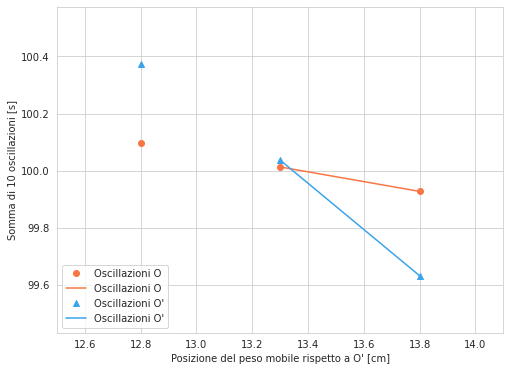

In [70]:
def plot3(ds):
    plt.figure(figsize=(8,6))

    fmts = iter(['o', '^'])
    labels = iter(["Oscillazioni O", "Oscillazioni O'", "Oscillazioni O", "Oscillazioni O'"])
    colors = iter([palette[x] for x in [1, 12, 1, 12] ])

    def plot3_1(dss):
        X = dss.dist.values
        Y = dss.period

        plt.plot(X, Y, next(fmts), label=next(labels), color=next(colors))
    
    def plot3_2(dss):
        X = dss.dist.values
        Y = dss.period

        plt.plot(X, Y, '-', label=next(labels), color=next(colors))

    plot3_1(ds.sel(dir='O'))
    plot3_1(ds.sel(dir='Op'))

    #

    condition = ds.dist > 13
    plot3_2(ds.sel(dir='O').where(condition, drop=True))    
    plot3_2(ds.sel(dir='Op').where(condition, drop=True))

    #

    # Lims
    xmin, xmax = min(ds.dist.values), max(ds.dist.values)
    ymin, ymax = ds.period.min(), ds.period.max()
    plt.xlim(xmin - .3, xmax + .3)
    plt.ylim(ymin - .2, ymax + .2)

    # plt.xticks(range(10,100,10))

    plt.xlabel("Posizione del peso mobile rispetto a O' [cm]")
    plt.ylabel("Somma di 10 oscillazioni [s]")

    # Legend
    order = [0,2,1,3]
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='lower left', ncol=1)
    
    plt.savefig(graph_base_name+'fase3', dpi=200)

plot3(ds3s)


In [21]:
ds3s.period.sel(dir='O').to_numpy()

array([100.0954, 100.0126,  99.9269])

In [22]:
def fit(X,Y):
    N = X.size
    DELTA = N * (X ** 2).sum() - (X.sum()) ** 2
    a = ((X**2).sum()*(Y.sum()) - (X.sum())*(X*Y).sum()) / DELTA # q
    b = (N*(X*Y).sum() - (X.sum())*(Y.sum())) / DELTA            # m
    #
    SIGy = ((((a+b*X)-Y)**2).sum()/ (N-2)) ** .5
    SIGa = SIGy * ((X**2).sum() / DELTA) ** .5
    SIGb = SIGy * (N / DELTA) ** .5
    return a, SIGa, b, SIGb

In [23]:
q0, q0s, m0, m0s = fit(ds3s.dist.values, ds3s.period.sel(dir='O').to_numpy())
q1, q1s, m1, m1s = fit(ds3s.dist.values, ds3s.period.sel(dir='Op').to_numpy())

In [32]:
q0, q0s, m0, m0s

(102.25268333333278,
 0.02227888811350314,
 -0.1684999999999639,
 0.0016743157806810096)

In [33]:
q1, q1s, m1, m1s

(109.90660666666612,
 0.514719139164683,
 -0.7437999999999624,
 0.03868246803572027)

In [31]:
x_def = (q0-q1)/(m1-m0)
x_def

13.304229677269875

In [36]:
S1 = 1 / (m1-m0)
S2 = (q1-q0) / (m1-m0)

x_def_sigma = ((S1*q0s)**2 + (S1*q1s)**2 + (S2*m0s)**2 + (S2*m1s)**2) ** .5
x_def_sigma

1.0331182118738602

## Fase 4

In [49]:
f4 = np.stack([np.genfromtxt(x, delimiter=',')[:50,0] for x in glob.glob('./Misure/fase4/*')], axis=0)

##### 50 oscillazioni per 5 volte

In [50]:
t50_i = f4.sum(axis=1)
t50_i

array([100.0244, 100.0133, 100.0145, 100.0124, 100.013 ])

In [51]:
t50_i_sig = 0.00005

##### Media di 50 oscillazioni

In [52]:
t50_m = t50_i.mean()
t50_m

100.01552

In [53]:
t50_std = t50_i.std()
t50_std

0.004492393571350833

In [54]:
t50_m_err = t50_std / 5**.5
t50_m_err

0.002009059481444703

##### Tempo di una oscillazione

In [55]:
t1 = t50_m / 50
t1

2.0003104

In [56]:
t1_sigma = t50_m_err / 50
t1_sigma

4.0181189628894056e-05

##### Stima g

In [57]:
stima_g = 4 * math.pi**2 * .9945 / t1**2
stima_g

9.81227561018529

In [58]:
L = 0.9945
delta_L = 0.0002

In [59]:
sigma_stima_g = ((4*math.pi**2*delta_L/t1**2)**2 + (8*math.pi**2*L*t1_sigma/t1**3)**2) ** .5
sigma_stima_g

0.002012298548484671

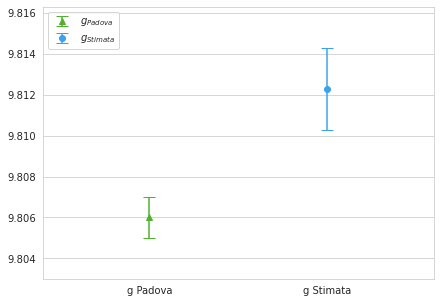

In [72]:
def plot4():
    X = [0, 1]
    Xlab = ['g Padova', 'g Stimata']

    Y = [g_padova, stima_g]
    Yerr = [sigma_g_padova, sigma_stima_g]

    plt.figure(figsize=(7,5))

    plt.errorbar([0], [g_padova], [sigma_g_padova], fmt='^', capsize=6, color=palette[6], label='$g_{Padova}$')
    plt.errorbar([1], [stima_g], [sigma_stima_g], fmt='o', capsize=6, color=palette[12], label='$g_{Stimata}$')

    plt.gca().grid(axis='x')

    plt.xlim(-.6,1.6)
    plt.ylim(g_padova-sigma_g_padova-.002, stima_g+sigma_stima_g+.002)

    plt.xticks(X, Xlab)

    plt.legend(loc='upper left')
    
    plt.savefig(graph_base_name+'stima_g', dpi=200)

plot4()

### Export

In [42]:
da1.to_dataframe().to_excel('dump_fase1.xlsx')
ds2s.to_dataframe().to_excel('dump_fase2.xlsx')
ds3s.to_dataframe().to_excel('dump_fase3.xlsx')